In [122]:
import pygsp as pg
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

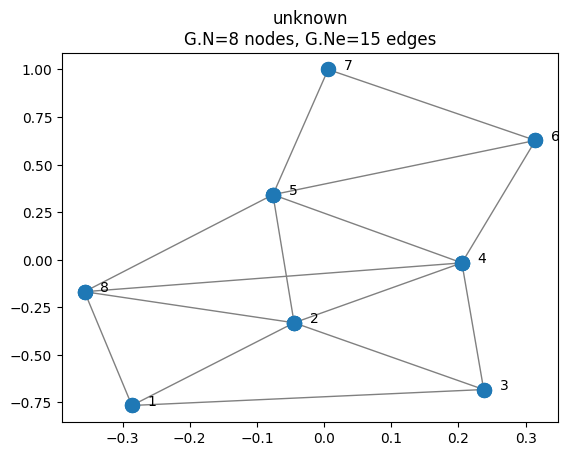

In [123]:
A = np.zeros((8,8))
A[0, [1,2,7]] = 1
A[1, [0,2,3,4,7]] = 1
A[2, [0,1,3]] = 1
A[3, [1,2,4,5,7]] = 1
A[4, [1,3,5,6,7]] = 1
A[5, [3,4,6]] = 1
A[6, [4,5]] = 1
A[7, [0,1,3,4]] = 1

G = pg.graphs.Graph(A)
G.set_coordinates()
G.plot()

for i, (x, y) in enumerate(G.coords): 
    plt.text(x+0.03, y, str(i+1), fontsize=10, ha='center')
plt.show()

SNR: 10.908


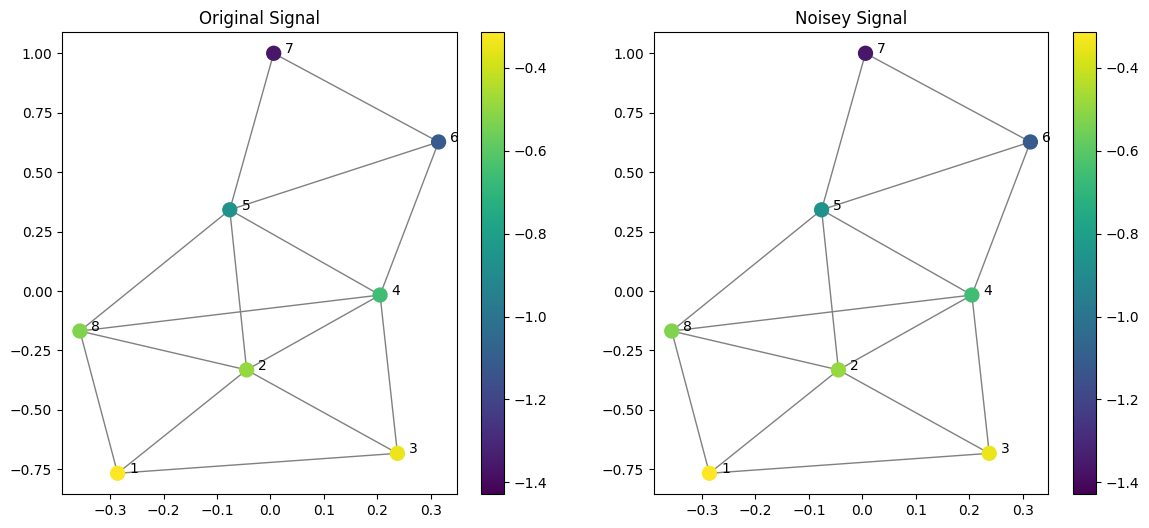

In [176]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

G.compute_fourier_basis()
x_org = 2*G.U[:,0] + G.U[:, 1]
x_n = x_org + np.random.normal(0, np.sqrt(1/80)*np.linalg.norm(x_org), size=8)

G.plot_signal(x_org, ax=ax[0])
for i, (p_x, p_y) in enumerate(G.coords): 
    ax[0].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
ax[0].set_title('Original Signal')

G.plot_signal(x_org, ax=ax[1])
for i, (p_x, p_y) in enumerate(G.coords): 
    ax[1].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
ax[1].set_title('Noisey Signal')

print(f'SNR: {20*np.log10(np.linalg.norm(x_org)/np.linalg.norm(x_n-x_org)):.3f}')
plt.show()

0.3566441275050085


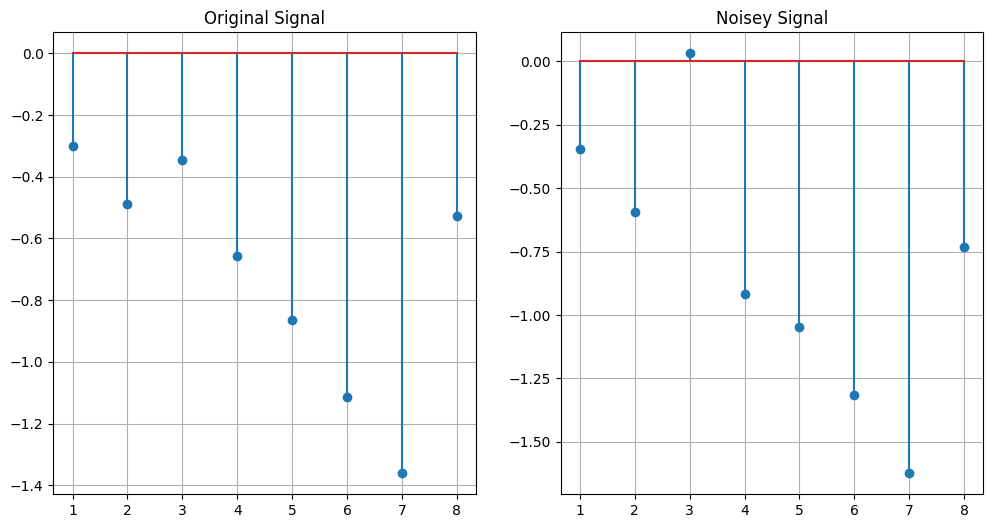

In [177]:
fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.stem(range(1,9), x_org)
plt.title('Original Signal')
plt.grid('on')

plt.subplot(1,2,2)
plt.stem(range(1,9), x_n)
plt.title('Noisey Signal')
plt.grid('on')

print(np.linalg.norm(x))

Text(0.5, 0.98, 'Laplacian Spectrum')

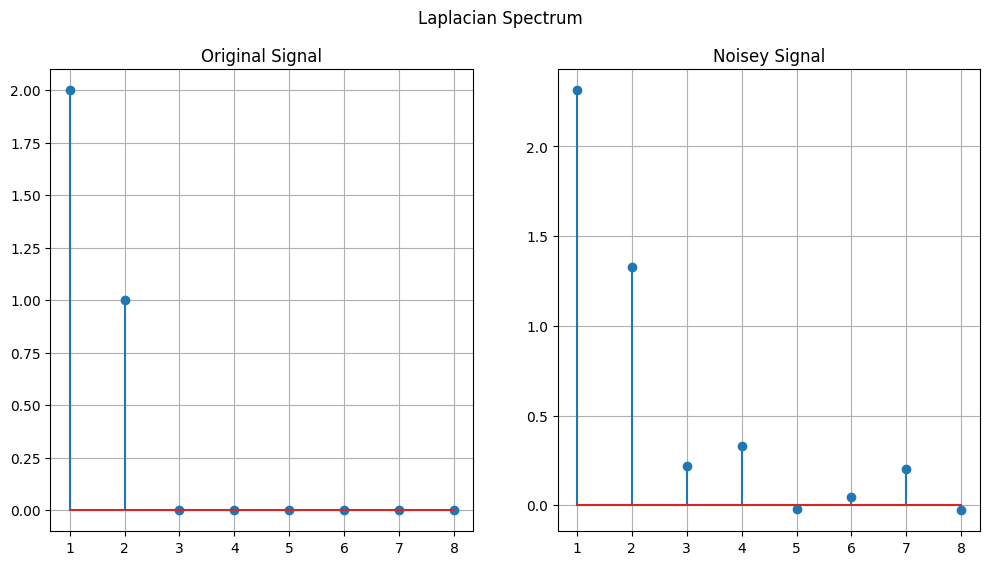

In [199]:
x_hat_org = G.U.T @ x_org
x_hat_n = G.U.T @ x_n

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.stem(range(1,9), x_hat_org)
plt.title('Original Signal')
plt.grid('on')

plt.subplot(1,2,2)
plt.stem(range(1,9), x_hat_n)
plt.title('Noisey Signal')
plt.grid('on')

fig.suptitle('Laplacian Spectrum')

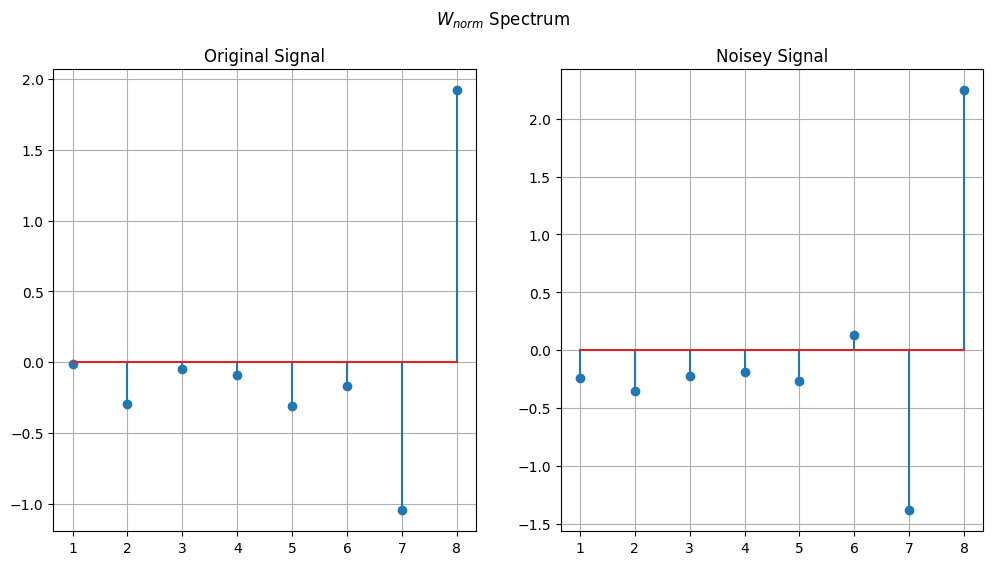

In [202]:
D_sq = np.diag(1/np.sqrt(np.sum(A, axis= 1)))
e, V = np.linalg.eig(D_sq @ A @ D_sq)
s = np.argsort(e)
e = e[s]
V = V[:, s]

x_hat_org = V.T @ x_org
x_hat_n = V.T @ x_n

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.stem(range(1,9), x_hat_org)
plt.title('Original Signal')
plt.grid('on')

plt.subplot(1,2,2)
plt.stem(range(1,9), x_hat_n)
plt.title('Noisey Signal')
plt.grid('on')

fig.suptitle('$W_{norm}$ Spectrum')
plt.show()

Text(0.5, 1.0, '$W_{norm}$ filter')

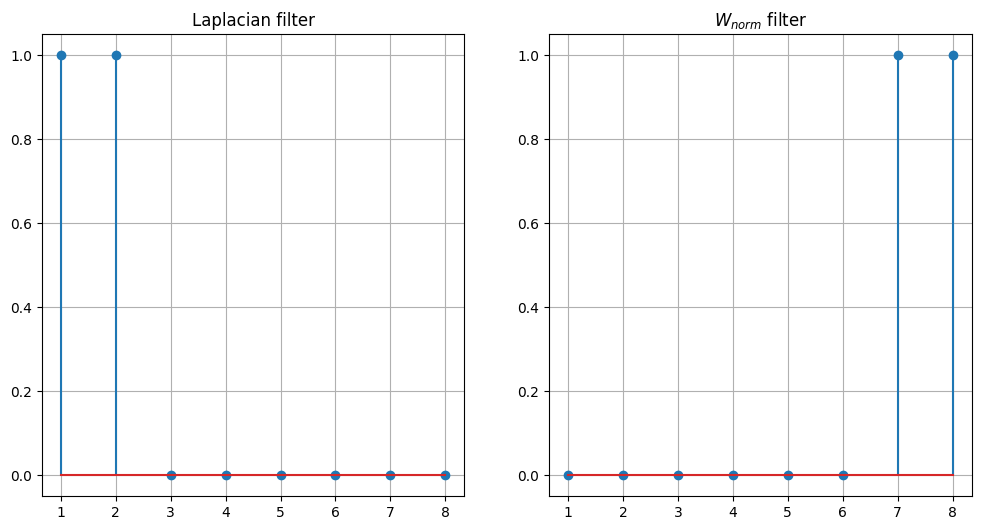

In [209]:
h_L = np.zeros(8)
h_L[[0, 1]] = 1

h_W = np.zeros(8)
h_W[[-1, -2]] = 1

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.stem(range(1,9), h_L)
plt.grid('on')
plt.title('Laplacian filter')

plt.subplot(1,2,2)
plt.stem(range(1,9), h_W)
plt.grid('on')
plt.title('$W_{norm}$ filter')

Text(0.5, 0.98, 'Laplacian Resluts')

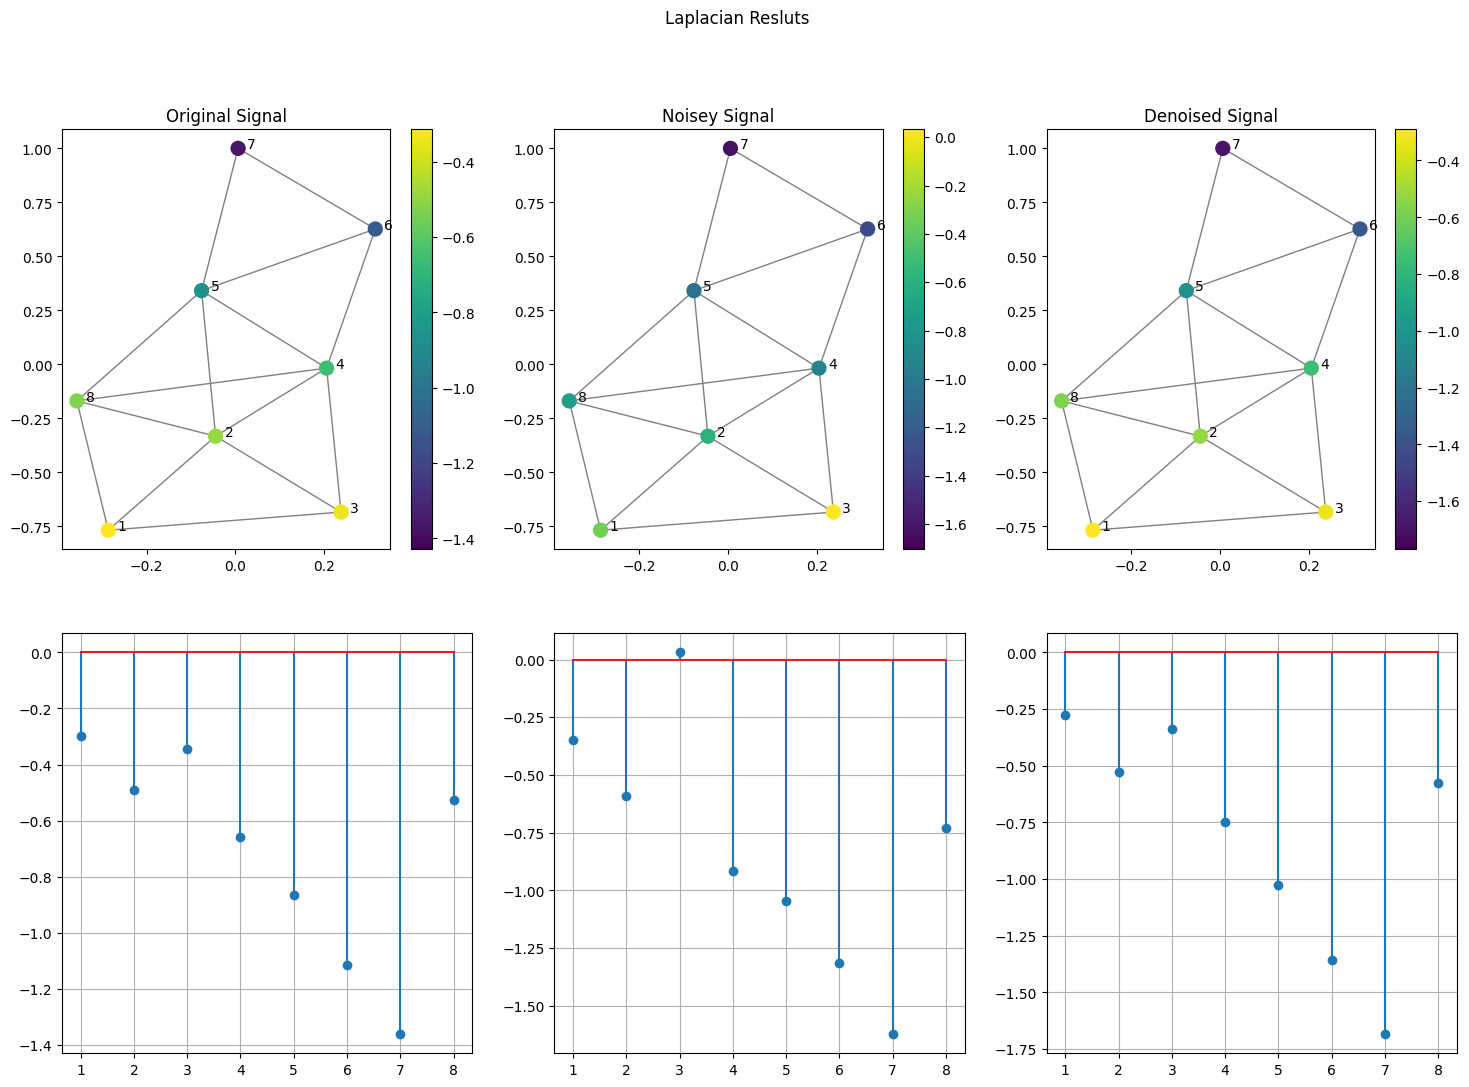

In [219]:
fig, axes = plt.subplots(2,3, figsize=(18,12))

x_r_L = G.U @ np.diag(h_L) @ G.U.T @ x_n

G.plot_signal(x_org, ax=axes[0, 0])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 0].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 0].set_title('Original Signal')

G.plot_signal(x_n, ax=axes[0, 1])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 1].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 1].set_title('Noisey Signal')

G.plot_signal(x_r_L, ax=axes[0, 2])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 2].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 2].set_title('Denoised Signal')

axes[1, 0].stem(range(1,9), x_org)
axes[1, 0].grid('on')

axes[1, 1].stem(range(1,9), x_n)
axes[1, 1].grid('on')

axes[1, 2].stem(range(1,9), x_r_L)
axes[1, 2].grid('on')


fig.suptitle('Laplacian Resluts')

Text(0.5, 0.98, '$W_{norm}$ Resluts')

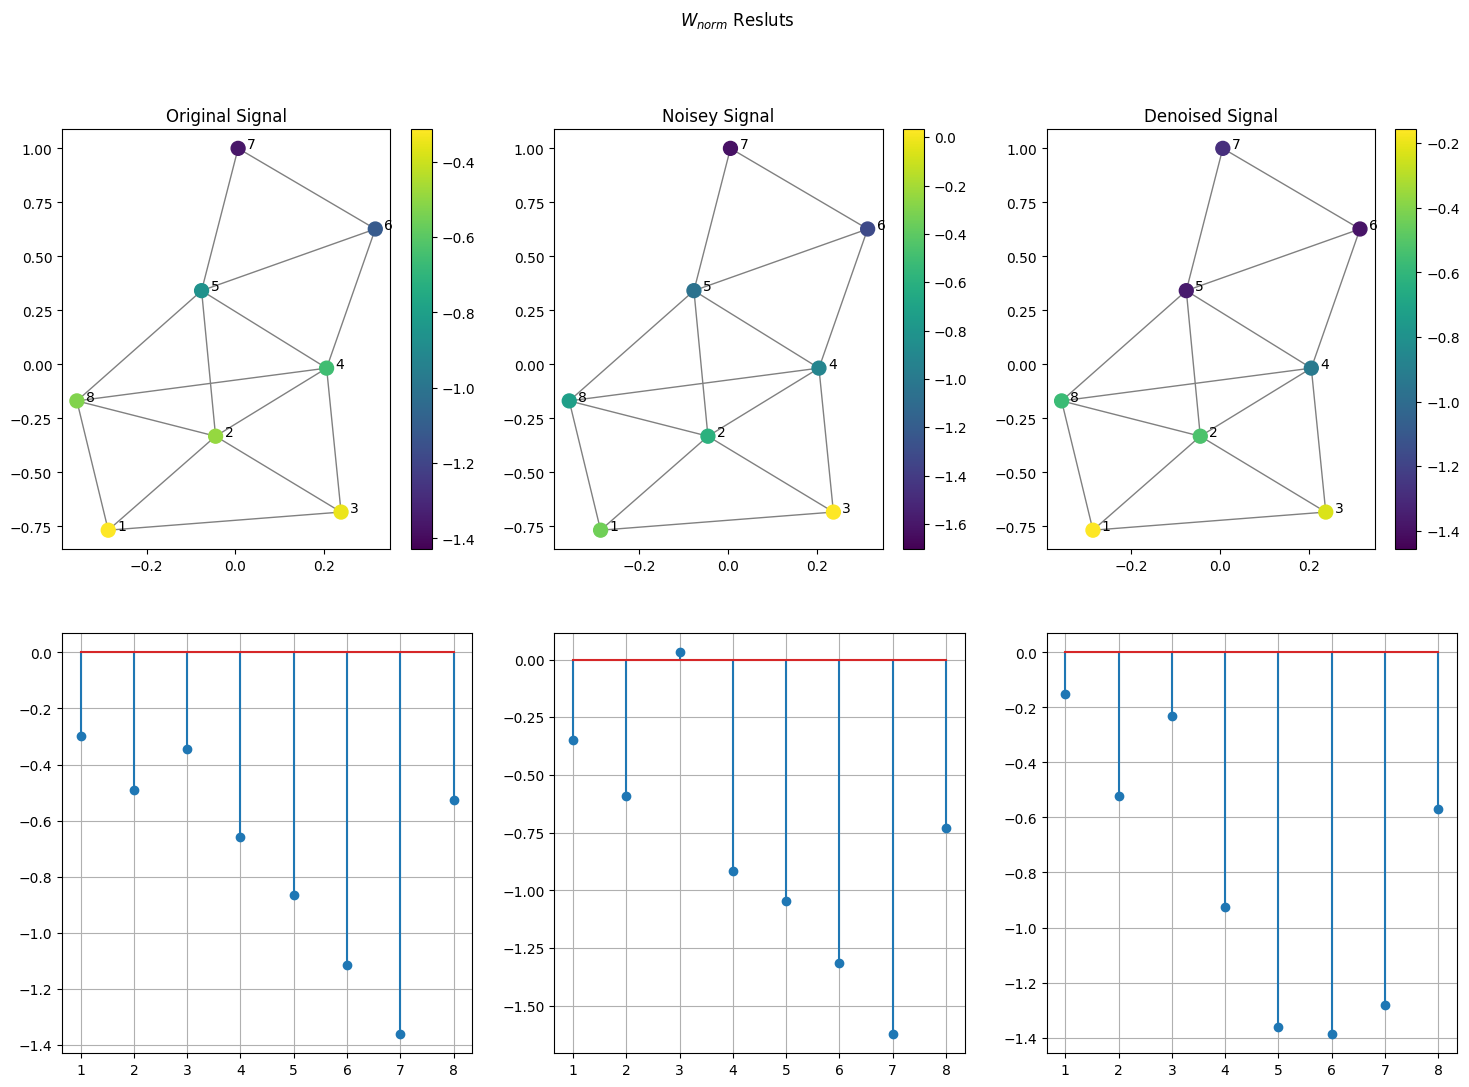

In [272]:
fig, axes = plt.subplots(2,3, figsize=(18,12))

x_r_W = V @ np.diag(h_W) @ V.T @ x_n

G.plot_signal(x_org, ax=axes[0, 0])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 0].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 0].set_title('Original Signal')

G.plot_signal(x_n, ax=axes[0, 1])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 1].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 1].set_title('Noisey Signal')

G.plot_signal(x_r_W, ax=axes[0, 2])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 2].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 2].set_title('Denoised Signal')

axes[1, 0].stem(range(1,9), x_org)
axes[1, 0].grid('on')

axes[1, 1].stem(range(1,9), x_n)
axes[1, 1].grid('on')

axes[1, 2].stem(range(1,9), x_r_W)
axes[1, 2].grid('on')


fig.suptitle('$W_{norm}$ Resluts')

In [276]:
print(f'L filter output SNR: {20*np.log10(np.linalg.norm(x_r_L)/np.linalg.norm(x_r_L - x_org)):.2f}')
print(f'W filter output SNR: {20*np.log10(np.linalg.norm(x_r_W)/np.linalg.norm(x_r_W - x_org)):.2f}')

L filter output SNR: 15.41
W filter output SNR: 12.01


Laplacian Filter achieves a better SNR

The objective is to make this filter like the ideal one as much as possible
$$ U \, \text{diag}(\vec{h}) \, U^H = h_0 I + h_1 S + h_2 S^2 = U (h_0 I + h_1 \Lambda + h_2 \Lambda^2) U^H $$
$$ \text{let} \; \text{diag}(\vec{\lambda}) = \Lambda \; \text{and} \; \text{diag}(\vec{\lambda^2}) = \Lambda^2 $$
$$ \rightarrow \vec{h} = h_0 \vec{1} + h_1 \vec{\lambda} + h_2 \vec{\lambda^2} $$
$$ A = [\vec{1}, \vec{\lambda}, \vec{\lambda^2}] \; \text{and} \; \hat{\vec{h}} = [h_0, h_1, h_2]^T $$
$$ \hat{\vec{h^*}} = \text{argmin} \, \|A \hat{\vec{h}} - \vec{h}\|_2^2 \rightarrow \hat{\vec{h^*}} = A^{\dag} \vec{h}$$

In [289]:
A = np.array([np.ones(8), G.e, G.e**2]).T
h_hat_L = np.linalg.pinv(A) @ h_L
h_est_L = h_hat_L[0]*np.ones(8) + h_hat_L[1]*G.e + h_hat_L[2]*(G.e**2)

A = np.array([np.ones(8), e, e**2]).T
h_hat_W = np.linalg.pinv(A) @ h_W
h_est_W = h_hat_W[0]*np.ones(8) + h_hat_W[1]*e + h_hat_W[2]*(e**2)

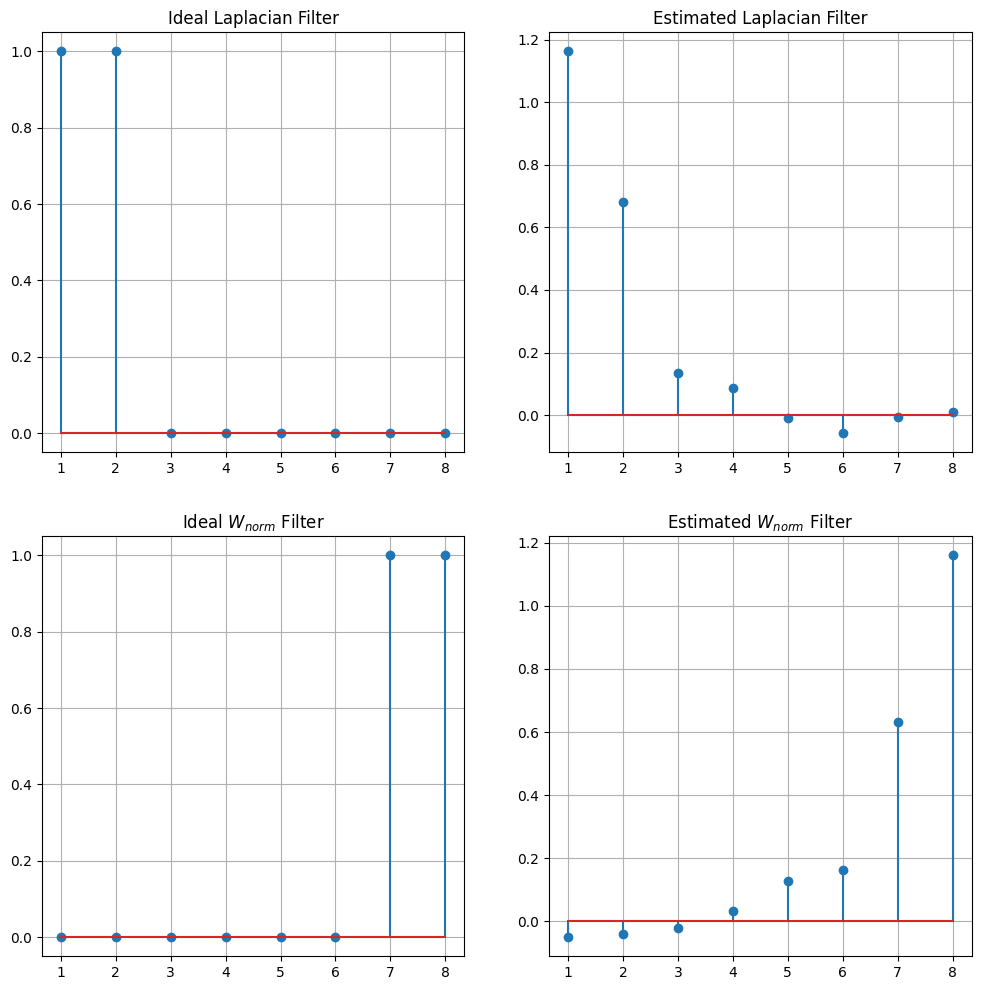

In [290]:
fig = plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.stem(range(1,9), h_L)
plt.title('Ideal Laplacian Filter')
plt.grid('on')

plt.subplot(2,2,2)
plt.stem(range(1,9), h_est_L)
plt.title('Estimated Laplacian Filter')
plt.grid('on')

plt.subplot(2,2,3)
plt.stem(range(1,9), h_W)
plt.title('Ideal $W_{norm}$ Filter')
plt.grid('on')

plt.subplot(2,2,4)
plt.stem(range(1,9), h_est_W)
plt.title('Estimated $W_{norm}$ Filter')
plt.grid('on')

plt.show()

Text(0.5, 0.98, 'Laplacian Resluts')

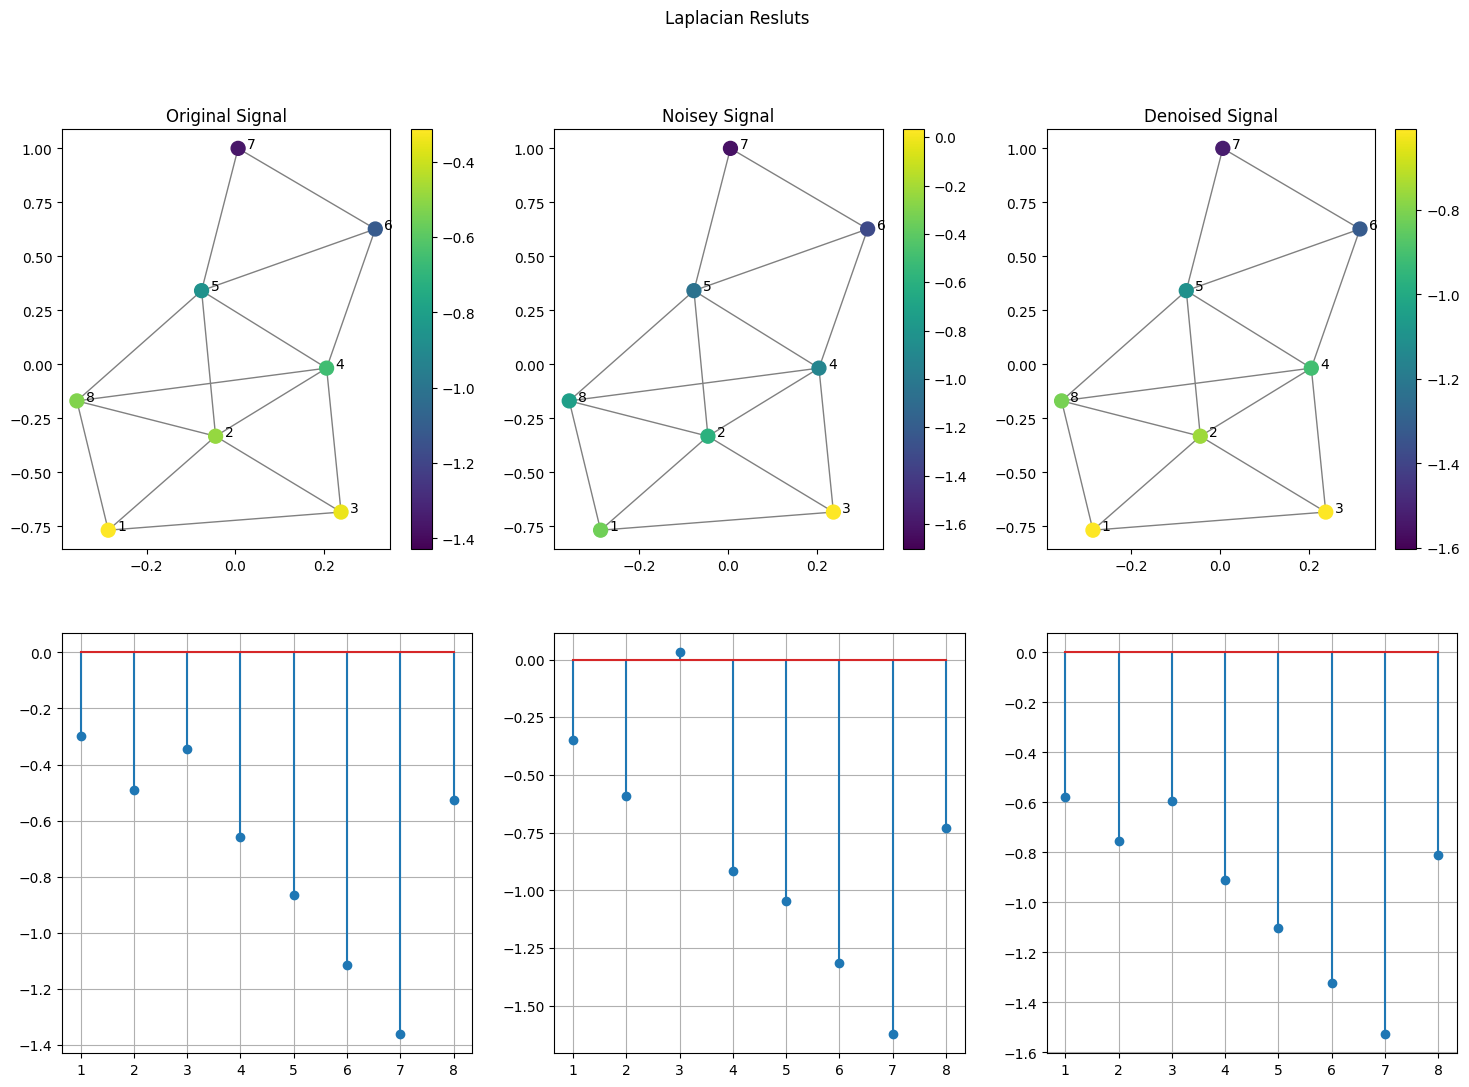

In [270]:
fig, axes = plt.subplots(2,3, figsize=(18,12))

x_r2_L = G.U @ np.diag(h_est_L) @ G.U.T @ x_n

G.plot_signal(x_org, ax=axes[0, 0])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 0].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 0].set_title('Original Signal')

G.plot_signal(x_n, ax=axes[0, 1])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 1].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 1].set_title('Noisey Signal')

G.plot_signal(x_r2_L, ax=axes[0, 2])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 2].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 2].set_title('Denoised Signal')

axes[1, 0].stem(range(1,9), x_org)
axes[1, 0].grid('on')

axes[1, 1].stem(range(1,9), x_n)
axes[1, 1].grid('on')

axes[1, 2].stem(range(1,9), x_r2_L)
axes[1, 2].grid('on')


fig.suptitle('Laplacian Resluts')

Text(0.5, 0.98, '$W_{norm}$ Resluts')

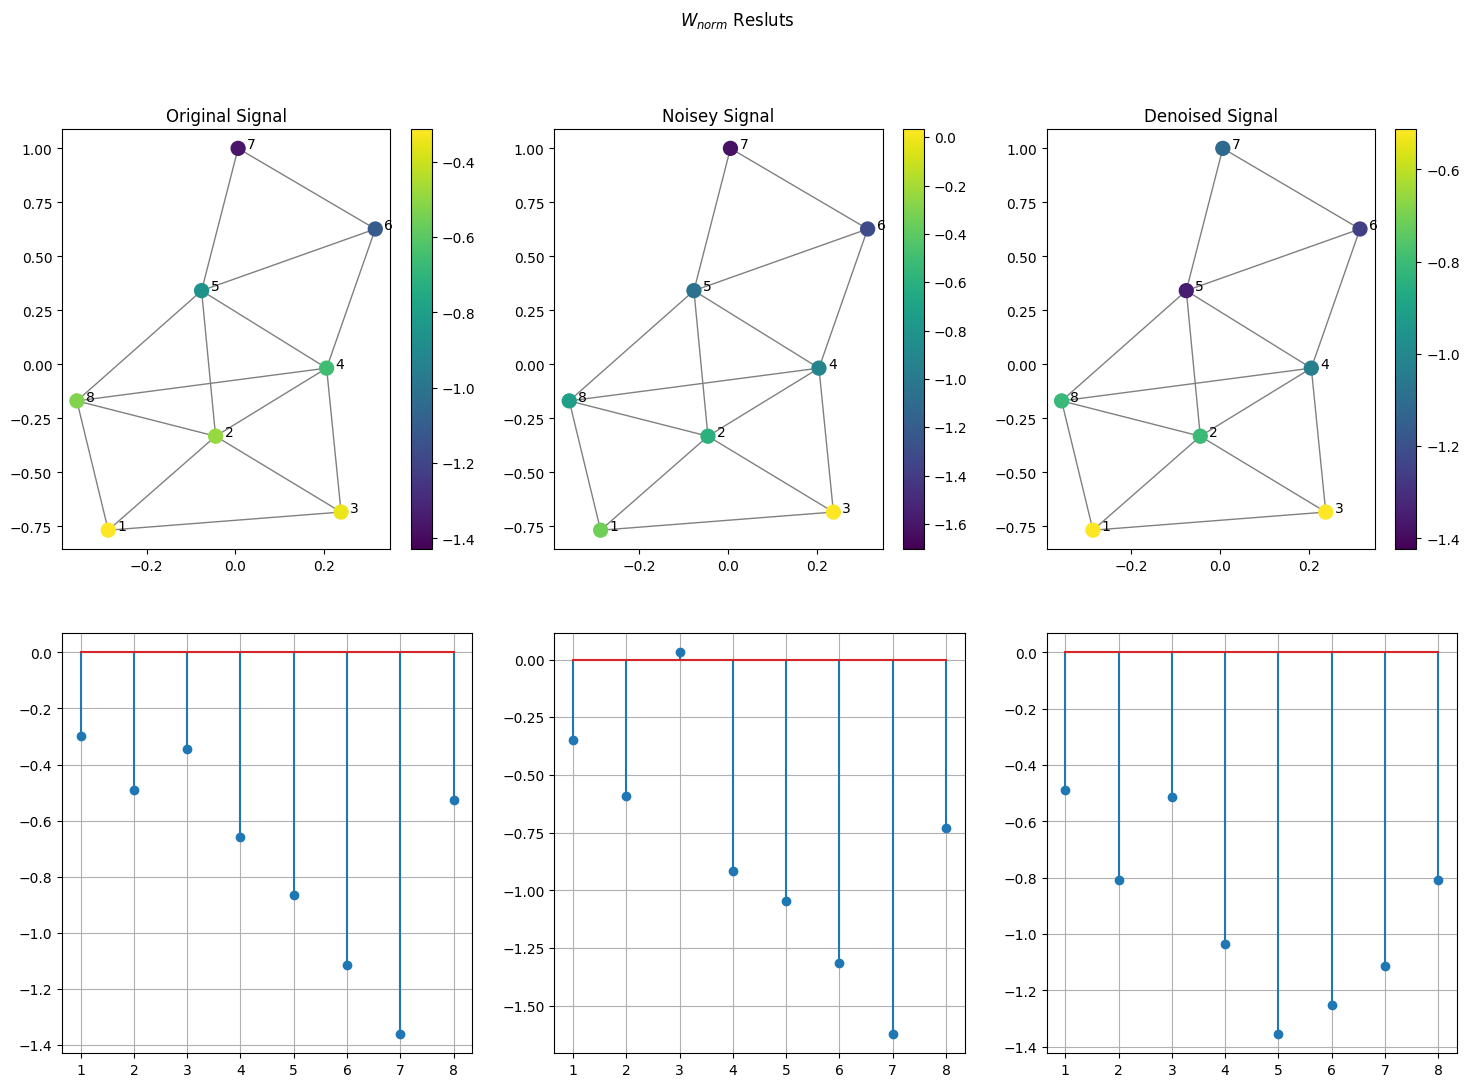

In [271]:
fig, axes = plt.subplots(2,3, figsize=(18,12))

x_r2_W = V @ np.diag(h_est_W) @ V.T @ x_n

G.plot_signal(x_org, ax=axes[0, 0])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 0].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 0].set_title('Original Signal')

G.plot_signal(x_n, ax=axes[0, 1])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 1].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 1].set_title('Noisey Signal')

G.plot_signal(x_r2_W, ax=axes[0, 2])
for i, (p_x, p_y) in enumerate(G.coords): 
    axes[0, 2].text(p_x+0.03, p_y, str(i+1), fontsize=10, ha='center')
axes[0, 2].set_title('Denoised Signal')

axes[1, 0].stem(range(1,9), x_org)
axes[1, 0].grid('on')

axes[1, 1].stem(range(1,9), x_n)
axes[1, 1].grid('on')

axes[1, 2].stem(range(1,9), x_r2_W)
axes[1, 2].grid('on')


fig.suptitle('$W_{norm}$ Resluts')

In [286]:
print(f'Ideal L filter output SNR:         {20*np.log10(np.linalg.norm(x_r_L)/np.linalg.norm(x_org - x_r_L)):.2f}')
print(f'Ideal W filter output SNR:         {20*np.log10(np.linalg.norm(x_r_W)/np.linalg.norm(x_org - x_r_W)):.2f}')
print(f'Estimated L filter output SNR:     {20*np.log10(np.linalg.norm(x_r_L)/np.linalg.norm(x_org - x_r2_L)):.2f}')
print(f'Estimated W filter output SNR:     {20*np.log10(np.linalg.norm(x_r_W)/np.linalg.norm(x_org - x_r2_W)):.3f}')

Ideal L filter output SNR:         15.41
Ideal W filter output SNR:         12.01
Estimated L filter output SNR:     11.66
Estimated W filter output SNR:     9.907
